In [ ]:
#
# hw4pr2digits_modeler:  handwritten-digit modeling with k-nearest neighbors...
#

In [ ]:
#
# SUGGESTION:  
# 
# +++ copy-paste-and-alter from the iris- + births-cleaning notebooks into here +++
#
# when the data is ready to view, you might want to grab
# the digits-visualization code    (it was in hw3pr2.ipynb)
#

In [1]:
# libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

In [3]:
cleaned_filename = "digits_clean.csv"
df_tidy = pd.read_csv(cleaned_filename)   # encoding="utf-8" et al.
print(f"{cleaned_filename} : file read into a pandas dataframe.")
df_tidy

digits_clean.csv : file read into a pandas dataframe.


,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix55,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,actual_digit
0,0,0,9,14,8,1,0,0,0,0,...,0,0,0,11,16,15,11,1,0,8
1,0,0,11,12,0,0,0,0,0,2,...,0,0,0,9,12,13,3,0,0,9
2,0,0,1,9,15,11,0,0,0,0,...,0,0,0,1,10,13,3,0,0,0
3,0,0,0,0,14,13,1,0,0,0,...,0,0,0,0,1,13,16,1,0,1
4,0,0,5,12,1,0,0,0,0,0,...,2,0,0,3,11,8,13,12,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1764,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1765,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1766,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


In [4]:
A = df_tidy.to_numpy() 

A = A.astype('float64')

X_all = A[:,0:64]  
y_all = A[:,64]    

indices = np.random.permutation(len(y_all))  # indices is a permutation-list
X_labeled = X_all[indices]              
y_labeled = y_all[indices]   

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

k = 84   # we don't know what k to use, so we guess!  (this will _not_ be a good value)
knn_model = KNeighborsClassifier(n_neighbors=k)       # here, k is the "k" in kNN

# we train the model (it's one line!)
knn_model.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a knn classifier with k =", k)  

predicted_labels = knn_model.predict(X_test)   
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

Created and trained a knn classifier with k = 84
Predicted labels: [5. 0. 2. 2. 8. 6. 4. 5. 7. 2. 6. 2. 7. 5. 9. 0. 4. 1. 2. 3. 2. 8. 5. 4.
 2. 2. 7. 6. 6. 5. 8. 9. 8. 3. 4. 3. 0. 8. 7. 6. 4. 4. 6. 3. 1. 9. 9. 9.
 7. 1. 5. 1. 0. 6. 4. 8. 2. 0. 8. 3. 5. 5. 8. 6. 7. 4. 9. 0. 9. 7. 0. 7.
 0. 9. 7. 8. 5. 4. 0. 5. 3. 4. 4. 3. 6. 6. 2. 3. 7. 0. 2. 7. 2. 4. 3. 7.
 8. 6. 7. 8. 5. 8. 2. 0. 5. 0. 6. 2. 4. 7. 3. 6. 1. 8. 7. 4. 3. 6. 3. 2.
 1. 7. 2. 1. 1. 9. 4. 3. 2. 6. 3. 6. 3. 9. 1. 6. 2. 5. 7. 5. 4. 1. 1. 9.
 2. 1. 9. 1. 9. 6. 3. 4. 4. 1. 0. 0. 2. 5. 3. 7. 5. 7. 8. 4. 0. 6. 6. 7.
 1. 5. 9. 1. 2. 6. 8. 8. 3. 4. 2. 2. 5. 9. 3. 1. 5. 2. 5. 1. 4. 3. 2. 0.
 0. 6. 4. 9. 8. 9. 4. 5. 4. 3. 9. 9. 3. 0. 8. 0. 4. 9. 1. 2. 3. 8. 9. 6.
 2. 7. 2. 2. 9. 0. 1. 2. 3. 5. 4. 7. 0. 6. 5. 4. 7. 8. 3. 5. 5. 3. 0. 7.
 0. 3. 1. 4. 4. 6. 0. 9. 6. 7. 6. 1. 7. 3. 1. 9. 9. 7. 9. 0. 8. 3. 3. 2.
 6. 4. 3. 6. 4. 8. 6. 1. 0. 1. 1. 5. 1. 8. 6. 6. 4. 9. 0. 3. 7. 5. 3. 6.
 1. 4. 9. 1. 2. 4. 1. 9. 3. 0. 7. 3. 5. 7. 9. 1. 6. 7. 9.

In [7]:
from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#
best_k = 84  # Not correct!
best_accuracy = 0.0  # also not correct...

# Note that we are cross-validating using only our TEST data!
for k in range(1,85):
    knn_cv_model = KNeighborsClassifier(n_neighbors=k)   # build knn_model for every k!
    cv_scores = cross_val_score( knn_cv_model, X_train, y_train, cv=5 )  # cv=5 means 80/20
    #print(cv_scores)  # just to see the five scores... 
    average_cv_accuracy = cv_scores.mean()  # mean() is numpy's built-in average function 
    print(f"k: {k:2d}  cv accuracy: {average_cv_accuracy:7.4f}")
    if average_cv_accuracy > best_accuracy:
        best_accuracy = average_cv_accuracy
        best_k = k

print(f"best_k = {best_k}   yields the highest average cv accuracy.")  # print the best one

k:  1  cv accuracy:  0.9859
k:  2  cv accuracy:  0.9824
k:  3  cv accuracy:  0.9845
k:  4  cv accuracy:  0.9816
k:  5  cv accuracy:  0.9844
k:  6  cv accuracy:  0.9802
k:  7  cv accuracy:  0.9816
k:  8  cv accuracy:  0.9809
k:  9  cv accuracy:  0.9823
k: 10  cv accuracy:  0.9816
k: 11  cv accuracy:  0.9802
k: 12  cv accuracy:  0.9767
k: 13  cv accuracy:  0.9739
k: 14  cv accuracy:  0.9717
k: 15  cv accuracy:  0.9696
k: 16  cv accuracy:  0.9674
k: 17  cv accuracy:  0.9689
k: 18  cv accuracy:  0.9667
k: 19  cv accuracy:  0.9668
k: 20  cv accuracy:  0.9653
k: 21  cv accuracy:  0.9646
k: 22  cv accuracy:  0.9625
k: 23  cv accuracy:  0.9618
k: 24  cv accuracy:  0.9604
k: 25  cv accuracy:  0.9597
k: 26  cv accuracy:  0.9590
k: 27  cv accuracy:  0.9583
k: 28  cv accuracy:  0.9554
k: 29  cv accuracy:  0.9562
k: 30  cv accuracy:  0.9554
k: 31  cv accuracy:  0.9540
k: 32  cv accuracy:  0.9547
k: 33  cv accuracy:  0.9505
k: 34  cv accuracy:  0.9498
k: 35  cv accuracy:  0.9484
k: 36  cv accuracy: 

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn_model_tuned = KNeighborsClassifier(n_neighbors=best_k)   # here, we use the best_k!

# we train the model (one line!)
knn_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print(f"Created + trained a knn classifier, now tuned with a (best) k of {best_k}") 

Created + trained a knn classifier, now tuned with a (best) k of 1


In [9]:
predicted_labels = knn_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual labels:", actual_labels)

# And, the overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.\n\n")

Predicted labels: [5. 0. 2. 1. 8. 6. 4. 5. 7. 2. 6. 2. 7. 5. 9. 9. 4. 1. 2. 3. 1. 8. 5. 4.
 2. 2. 7. 6. 6. 5. 8. 9. 8. 3. 4. 3. 0. 8. 7. 6. 4. 4. 1. 3. 1. 9. 1. 5.
 3. 8. 5. 1. 0. 6. 4. 3. 2. 0. 8. 3. 5. 5. 8. 6. 7. 4. 9. 0. 9. 4. 0. 7.
 0. 9. 7. 8. 5. 4. 0. 5. 3. 4. 4. 3. 6. 6. 2. 3. 7. 0. 2. 9. 2. 4. 3. 7.
 8. 6. 7. 8. 5. 8. 2. 0. 5. 0. 6. 2. 4. 7. 3. 6. 1. 8. 7. 4. 3. 6. 3. 2.
 8. 7. 2. 1. 1. 9. 4. 3. 2. 6. 3. 6. 3. 9. 1. 6. 2. 5. 7. 5. 4. 1. 1. 9.
 2. 1. 9. 1. 9. 6. 3. 4. 4. 1. 0. 0. 2. 5. 3. 7. 5. 2. 8. 4. 0. 6. 6. 7.
 8. 5. 9. 1. 2. 6. 8. 3. 3. 4. 2. 2. 5. 9. 3. 1. 5. 2. 5. 1. 4. 3. 2. 0.
 0. 6. 4. 9. 3. 9. 4. 5. 4. 3. 9. 9. 3. 0. 8. 0. 4. 9. 1. 2. 3. 8. 9. 6.
 2. 9. 2. 2. 9. 0. 1. 2. 3. 5. 4. 7. 0. 6. 5. 4. 7. 8. 3. 5. 5. 3. 0. 7.
 0. 3. 1. 4. 4. 6. 0. 9. 6. 7. 6. 1. 7. 3. 1. 9. 9. 7. 9. 0. 8. 3. 3. 2.
 6. 4. 3. 6. 4. 8. 6. 9. 0. 1. 1. 5. 2. 8. 6. 6. 4. 9. 0. 3. 7. 5. 3. 6.
 1. 4. 9. 8. 2. 4. 1. 9. 3. 0. 7. 3. 5. 7. 9. 1. 6. 7. 9. 3. 8. 2. 2. 3.
 3. 2. 1. 9. 5. 4. 7. 8. 9. 5. 1.

<br>

#### Digit-recognition experiments:
+ abstract the above process into a function, so that you can run the digit-modeling on <i>different numbers of pixel-rows</i> !
  + pixels 0..8 are the first row  (excluding 8)
  + pixels 0..16  are the first two rows... (excluding 16)
  + pixels 0..24  are the first three rows... (excluding 24)
  + and so on...
+ Run for pixels in the first row, first two rows, first three rows, etc.
+ Share your results (in an ASCII table - or, optionally, a lineplot! - of how the number of pixels available affects the recognition-accuracy)
+ This provides insight about the <u>redundancy</u> of our glyphs for digits (or letters) Some scripts/alphabets offer more redundancy than others (depending on <i>how</i> information is removed)

In [17]:
best = []
trainaccuracy = []
testaccuracy = []
for i in range(8):
    best_k = 84  # Not correct!
    best_accuracy = 0.0  # also not correct...

    # Note that we are cross-validating using only our TEST data!
    for k in range(1,85):
        knn_cv_model = KNeighborsClassifier(n_neighbors=k)   # build knn_model for every k!
        cv_scores = cross_val_score( knn_cv_model, X_train[:,0:8*(i+1)], y_train, cv=5 )  # cv=5 means 80/20
        #print(cv_scores)  # just to see the five scores... 
        average_cv_accuracy = cv_scores.mean()  # mean() is numpy's built-in average function 
        #print(f"k: {k:2d}  cv accuracy: {average_cv_accuracy:7.4f}")
        if average_cv_accuracy > best_accuracy:
            best_accuracy = average_cv_accuracy
            best_k = k
    best.append(best_k)
    trainaccuracy.append(best_accuracy)
    
    
    knn_model_tuned = KNeighborsClassifier(n_neighbors=best_k)   # here, we use the best_k!

    knn_model_tuned.fit(X_train[:,0:8*(i+1)], y_train)                              # yay!  trained!
    print(f"Created + trained a knn classifier, now tuned with a (best) k of {best_k}")
    
    predicted_labels = knn_model_tuned.predict(X_test[:,0:8*(i+1)])
    actual_labels = y_test

    # And, the overall results
    num_correct = sum(predicted_labels == actual_labels)
    total = len(actual_labels)
    print(f"\nResults on test set:  {num_correct} correct out of {total} total.\n\n")
    testaccuracy.append(num_correct/total)

Created + trained a knn classifier, now tuned with a (best) k of 43

Results on test set:  164 correct out of 354 total.


Created + trained a knn classifier, now tuned with a (best) k of 14

Results on test set:  240 correct out of 354 total.


Created + trained a knn classifier, now tuned with a (best) k of 6

Results on test set:  290 correct out of 354 total.


Created + trained a knn classifier, now tuned with a (best) k of 6

Results on test set:  318 correct out of 354 total.


Created + trained a knn classifier, now tuned with a (best) k of 1

Results on test set:  345 correct out of 354 total.


Created + trained a knn classifier, now tuned with a (best) k of 1

Results on test set:  347 correct out of 354 total.


Created + trained a knn classifier, now tuned with a (best) k of 1

Results on test set:  351 correct out of 354 total.


Created + trained a knn classifier, now tuned with a (best) k of 1

Results on test set:  350 correct out of 354 total.




In [22]:
import matplotlib.pyplot as plt

In [23]:
x = [1,2,3,4,5,6,7,8]

Text(0, 0.5, 'Best K')

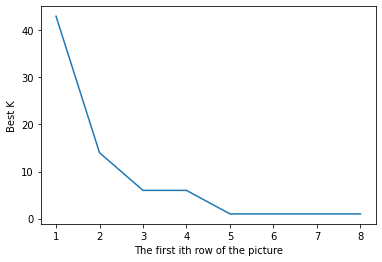

In [26]:
plt.plot(x, best)
plt.xlabel('The first ith row of the picture')
plt.ylabel('Best K')

Text(0, 0.5, 'Training Accuracy')

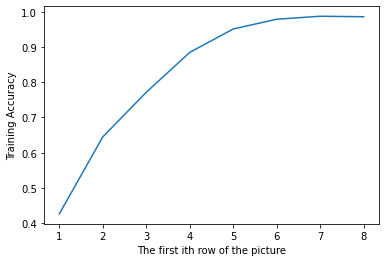

In [27]:
plt.plot(x, trainaccuracy)
plt.xlabel('The first ith row of the picture')
plt.ylabel('Training Accuracy')

Text(0, 0.5, 'Test Accuracy')

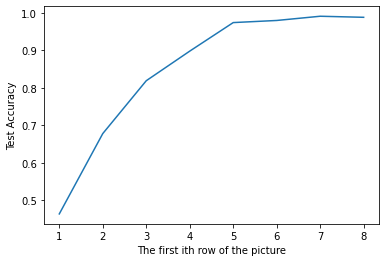

In [28]:
plt.plot(x, testaccuracy)
plt.xlabel('The first ith row of the picture')
plt.ylabel('Test Accuracy')